<a href="https://colab.research.google.com/github/shrishh9/deep-learning-project/blob/main/HVAC_fault_detection_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HVAC_NE_EC_19-21.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], utc=True)
df.set_index('Timestamp', inplace=True)
df = df.dropna()

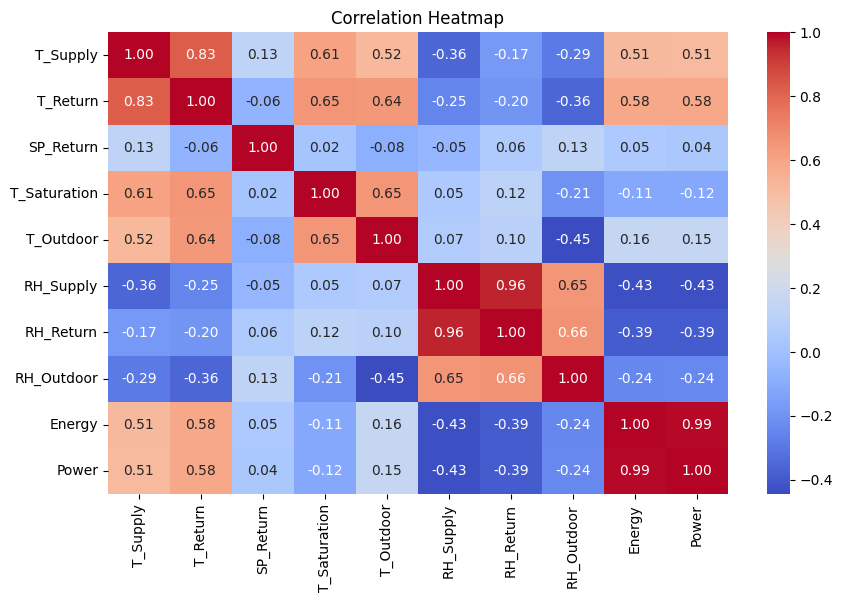

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



> T_Supply, T_Return, Energy, and Power are highly related

> SP_Return, RH_Outdoor, RH_Supply, and RH_Return have very weak or negative correlation with Energy/Power.





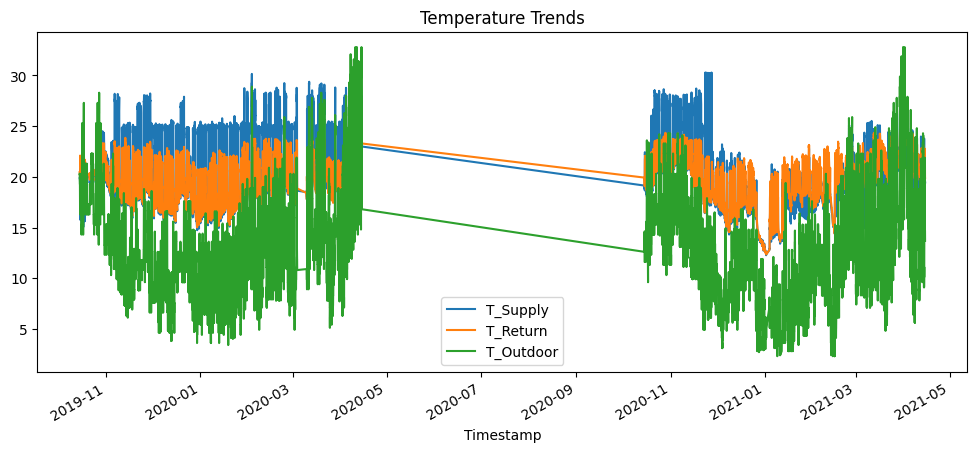

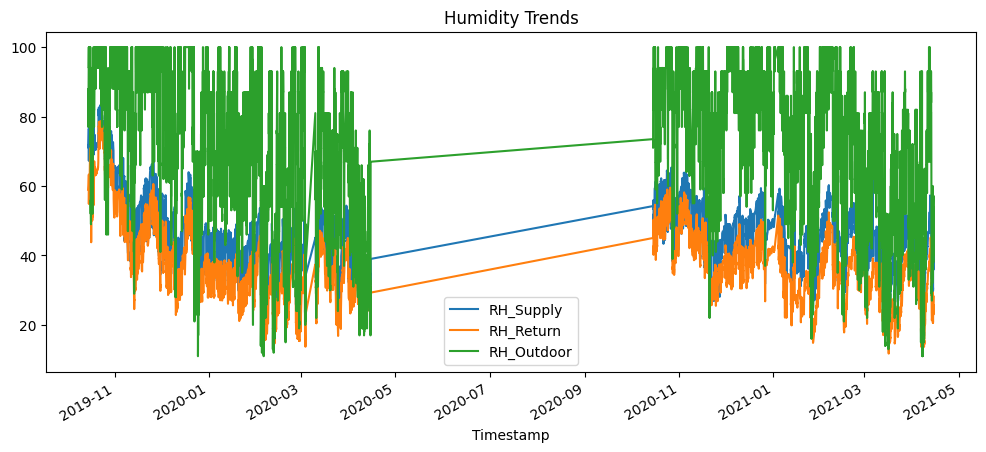

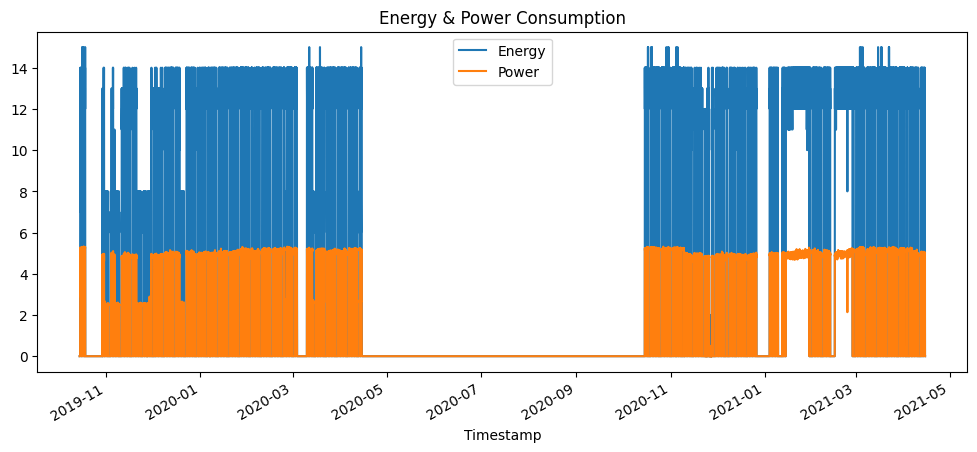

In [ ]:
df[['T_Supply', 'T_Return', 'T_Outdoor']].plot(figsize=(12,5), title='Temperature Trends')
plt.show()

df[['RH_Supply', 'RH_Return', 'RH_Outdoor']].plot(figsize=(12,5), title='Humidity Trends')
plt.show()

df[['Energy', 'Power']].plot(figsize=(12,5), title='Energy & Power Consumption')
plt.show()

In [ ]:
features = ['T_Supply', 'T_Return', 'SP_Return', 'T_Saturation', 'T_Outdoor',
            'RH_Supply', 'RH_Return', 'RH_Outdoor', 'Energy']
target = 'Power'

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features + [target]])
scaled_df = pd.DataFrame(scaled, columns=features + [target])
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window, :-1])
        y.append(data[i+window, -1])
    return np.array(X), np.array(y)

window_size = 24
X, y = create_sequences(scaled_df.values, window_size)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0379 - mae: 0.1074 - val_loss: 0.0107 - val_mae: 0.0488
Epoch 2/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0174 - mae: 0.0570 - val_loss: 0.0100 - val_mae: 0.0472
Epoch 3/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0148 - mae: 0.0483 - val_loss: 0.0100 - val_mae: 0.0432
Epoch 4/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0177 - mae: 0.0538 - val_loss: 0.0107 - val_mae: 0.0510
Epoch 5/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0159 - mae: 0.0490 - val_loss: 0.0103 - val_mae: 0.0504
Epoch 6/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0164 - mae: 0.0502 - val_loss: 0.0105 - val_mae: 0.0479
Epoch 7/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0143 - mae: 0.0458 - val_loss: 0.0101 - val_mae: 0.0434
Epoch 8/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0166 - mae: 0.0495 - val_loss: 0.0112 - val_mae: 0.0549
Epoch 9/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 11

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_flat.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
dnn_model.fit(X_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0448 - mae: 0.1233 - val_loss: 0.0124 - val_mae: 0.0547
Epoch 2/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0195 - mae: 0.0733 - val_loss: 0.0153 - val_mae: 0.0838
Epoch 3/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0176 - mae: 0.0627 - val_loss: 0.0118 - val_mae: 0.0534
Epoch 4/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0171 - mae: 0.0595 - val_loss: 0.0120 - val_mae: 0.0552
Epoch 5/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0183 - mae: 0.0584 - val_loss: 0.0152 - val_mae: 0.0839
Epoch 6/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0179 - mae: 0.0576 - val_loss: 0.0102 - val_mae: 0.0435
Epoch 7/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0158 - mae: 0.0527 - val_loss: 0.0128 - val_mae: 0.0672
Epoch 8/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0164 - mae: 0.0549 - val_loss: 0.0103 - val_mae: 0.0454
Epoch 9/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - lo

📊 LSTM Model Evaluation:
MAE: 0.0593
MSE: 0.0164
RMSE: 0.1282
R² Score: 0.9268


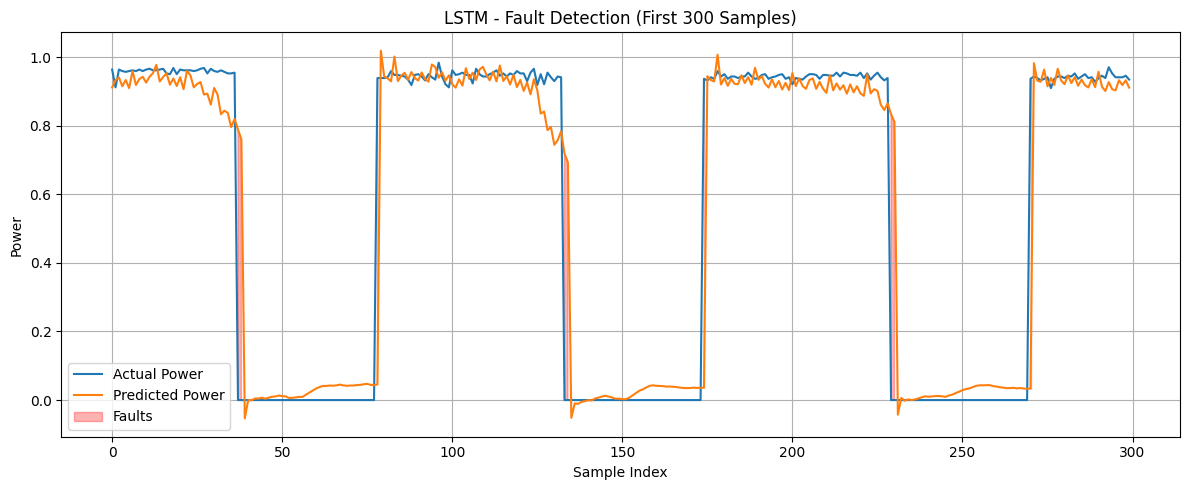

⚠️ Faults Detected: 118 out of 6773 samples


In [ ]:
print("📊 LSTM Model Evaluation:")

# Error Metrics
mae_lstm = mean_absolute_error(y_test, y_pred)
mse_lstm = mean_squared_error(y_test, y_pred)
rmse_lstm = math.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred)

print(f"MAE: {mae_lstm:.4f}")
print(f"MSE: {mse_lstm:.4f}")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"R² Score: {r2_lstm:.4f}")


#fault detection using lstm model
error = np.abs(y_test - y_pred)
threshold = np.mean(error) + 2 * np.std(error)
faults = error > threshold

plt.figure(figsize=(12, 5))
plt.plot(y_test[:300], label="Actual Power")
plt.plot(y_pred[:300], label="Predicted Power")
plt.fill_between(range(300), y_test[:300], y_pred[:300], where=faults[:300], color='red', alpha=0.3, label='Faults')
plt.title("LSTM - Fault Detection (First 300 Samples)")
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"⚠️ Faults Detected: {np.sum(faults)} out of {len(faults)} samples")

📊 DNN Model Evaluation:
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 0.0610
MSE: 0.0171
RMSE: 0.1309
R² Score: 0.9237


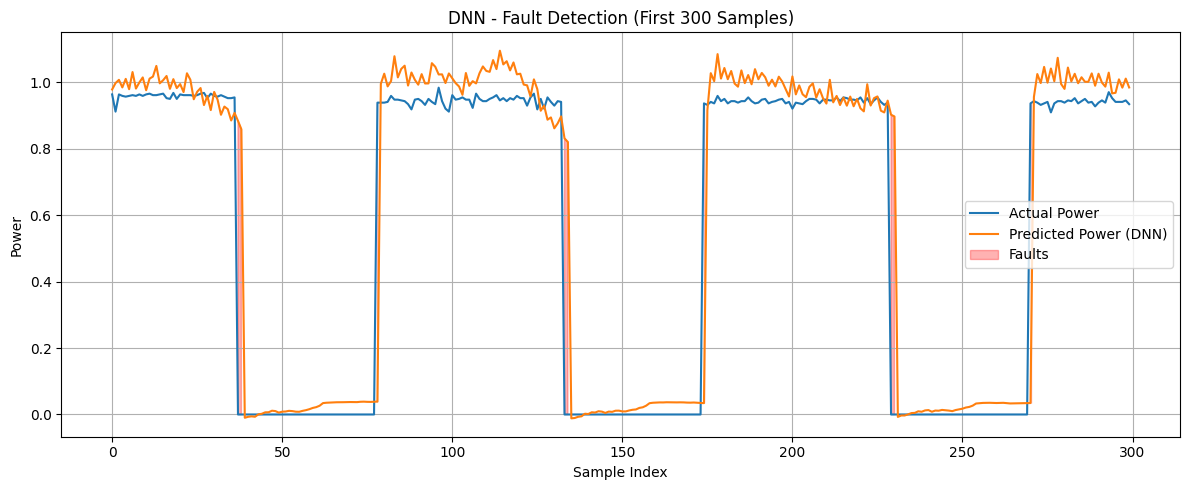

⚠️ Faults Detected (DNN): 118 out of 6773 samples


In [ ]:
print("📊 DNN Model Evaluation:")

# Predict and evaluate
y_pred_dnn = dnn_model.predict(X_test_flat).flatten()

# Error Metrics
mae_dnn = mean_absolute_error(y_test, y_pred_dnn)
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
rmse_dnn = math.sqrt(mse_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)

print(f"MAE: {mae_dnn:.4f}")
print(f"MSE: {mse_dnn:.4f}")
print(f"RMSE: {rmse_dnn:.4f}")
print(f"R² Score: {r2_dnn:.4f}")

#fault detection DNN model
error_dnn = np.abs(y_test - y_pred_dnn)
threshold_dnn = np.mean(error_dnn) + 2 * np.std(error_dnn)
faults_dnn = error_dnn > threshold_dnn

plt.figure(figsize=(12, 5))
plt.plot(y_test[:300], label="Actual Power")
plt.plot(y_pred_dnn[:300], label="Predicted Power (DNN)")
plt.fill_between(range(300), y_test[:300], y_pred_dnn[:300], where=faults_dnn[:300], color='red', alpha=0.3, label='Faults')
plt.title("DNN - Fault Detection (First 300 Samples)")
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"⚠️ Faults Detected (DNN): {np.sum(faults_dnn)} out of {len(faults_dnn)} samples")

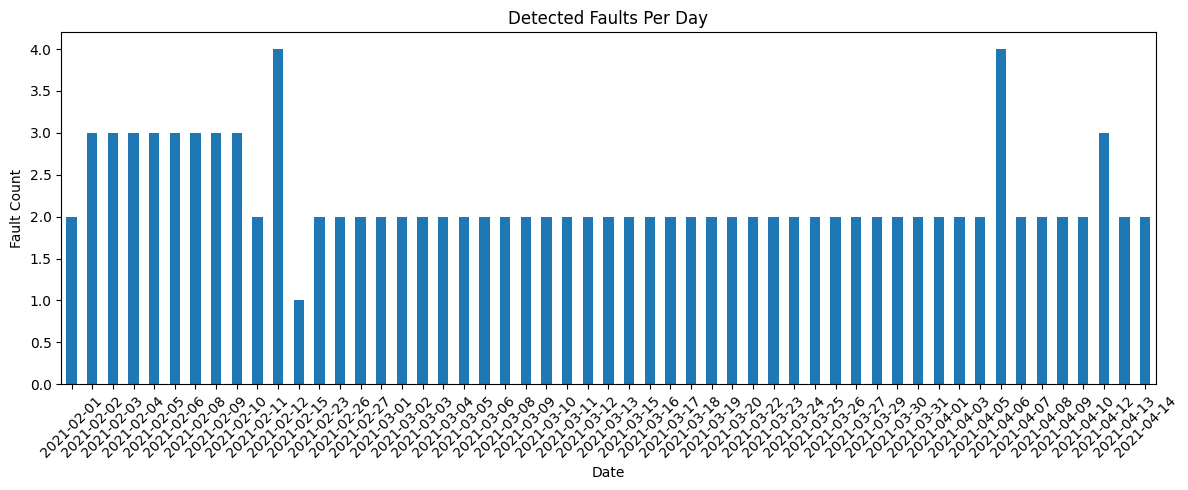

In [ ]:
fault_timestamps = df.index[-len(y_test):][faults]

# Create a DataFrame from fault timestamps
fault_df = pd.DataFrame({'Timestamp': fault_timestamps})

# Convert timezone-aware datetime to UTC and remove timezone info
fault_df['Timestamp'] = pd.to_datetime(fault_df['Timestamp'], utc=True)
fault_df['Timestamp'] = fault_df['Timestamp'].dt.tz_localize(None)

# Extract just the date part
fault_df['Day'] = fault_df['Timestamp'].dt.date

# Group by day and count
fault_report = fault_df.groupby('Day').size()

# Plot detected faults per day
fault_report.plot(kind='bar', figsize=(12, 5), title='Detected Faults Per Day')
plt.ylabel("Fault Count")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
